<a href="https://colab.research.google.com/github/ameenattar92/Cardiovascular-Risk-Prediction/blob/main/Hrithik_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts.

The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). 

The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

# **Data Description**
### **Demographic:**
* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

### **Behavioral**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

### **Medical( history)**
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (desired target)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [1]:
#Importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/Cardiovascular Risk Prediction - Hrithik Chourasia/data_cardiovascular_risk.csv'

In [4]:
cvs_df = pd.read_csv(path , index_col = "id")

#**1. Explorartory Data Analysis(EDA)**

In [5]:
#the first five observations
cvs_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
#the bottom five observations
cvs_df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [7]:
#Checking the shape of our dataset
cvs_df.shape

(3390, 16)

In [8]:
#Looking at the info of our dataset
cvs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [9]:
#Looking up for the detailed description of our dataset.
cvs_df.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [10]:
#Renaming the column names
cvs_df.rename(columns = {'totChol' : 'Total_Cholestrol'}, inplace=True)
cvs_df.rename(columns = {'sysBP' : 'Systolic_BP'}, inplace=True)
cvs_df.rename(columns = {'diaBP' : 'Diastolic_BP'}, inplace=True)

In [11]:
cvs_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,Total_Cholestrol,Systolic_BP,Diastolic_BP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


#**Exploring the dependent variable.**

In [12]:
#Checking the Null values
cvs_df['TenYearCHD'].isnull().sum()

0

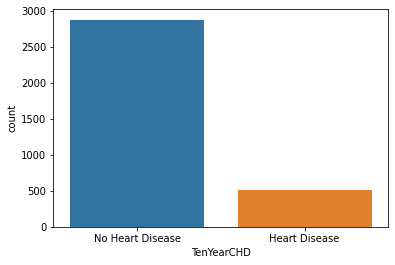

In [13]:
# visualizing the target variable
g = sns.countplot(cvs_df['TenYearCHD'])
g.set_xticklabels(['No Heart Disease','Heart Disease'])
plt.show()

In [14]:
# Class count
class_count_0, class_count_1 = cvs_df['TenYearCHD'].value_counts()

# Separate class
class_0 = cvs_df[cvs_df['TenYearCHD'] == 0]
class_1 = cvs_df[cvs_df['TenYearCHD'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (2879, 16)
class 1: (511, 16)




**Now let's go ahead and check for the missing values in rest of the dataset**

In [15]:
#Checking the missing values for whole dataset
missing_values = cvs_df.isnull()

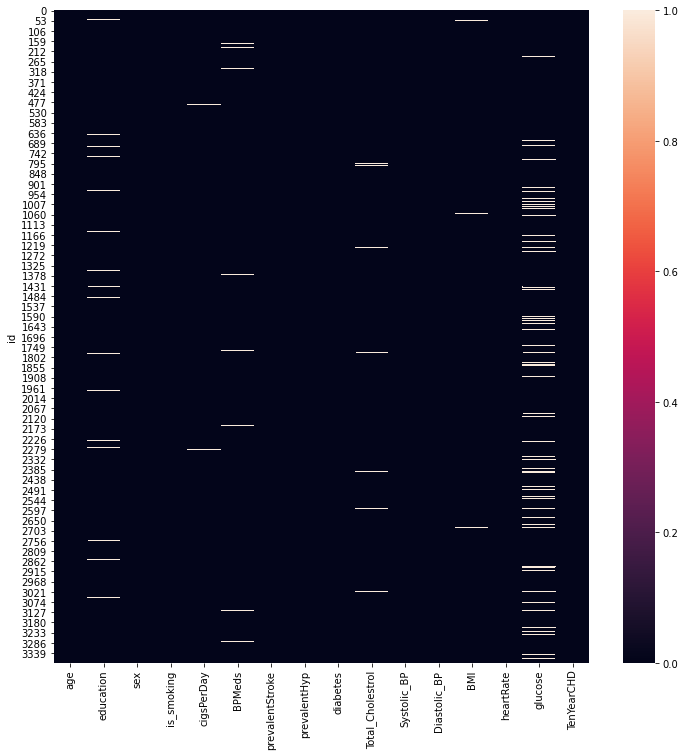

In [16]:
#Plotting the heatmap for missing values 

plt.figure(figsize=(12,12))
sns.heatmap(missing_values)

In [17]:
# Summing up the missing values 
cvs_df.isnull().sum()


age                   0
education            87
sex                   0
is_smoking            0
cigsPerDay           22
BPMeds               44
prevalentStroke       0
prevalentHyp          0
diabetes              0
Total_Cholestrol     38
Systolic_BP           0
Diastolic_BP          0
BMI                  14
heartRate             1
glucose             304
TenYearCHD            0
dtype: int64

**As we can see above the Glucose feature has the highest number of missing values followed by education, BPmeds, TotalCholestrol, CigsPerday, BMI & heartRate.**

In [18]:
# Filling up the numerical NaN values using mode

cvs_df['education'].fillna(cvs_df['education'].mode()[0], inplace=True)
cvs_df['cigsPerDay'].fillna(cvs_df['cigsPerDay'].mode()[0], inplace=True)
cvs_df['BPMeds'].fillna(cvs_df['BPMeds'].mode()[0], inplace=True)
cvs_df['Total_Cholestrol'].fillna(cvs_df['Total_Cholestrol'].mode()[0], inplace=True)
cvs_df['glucose'].fillna(cvs_df['glucose'].mode()[0], inplace=True)
cvs_df['BMI'].fillna(cvs_df['BMI'].mode()[0], inplace=True)
cvs_df['heartRate'].fillna(cvs_df['heartRate'].mode()[0], inplace=True)

In [19]:
filled_NaN = cvs_df.isnull()

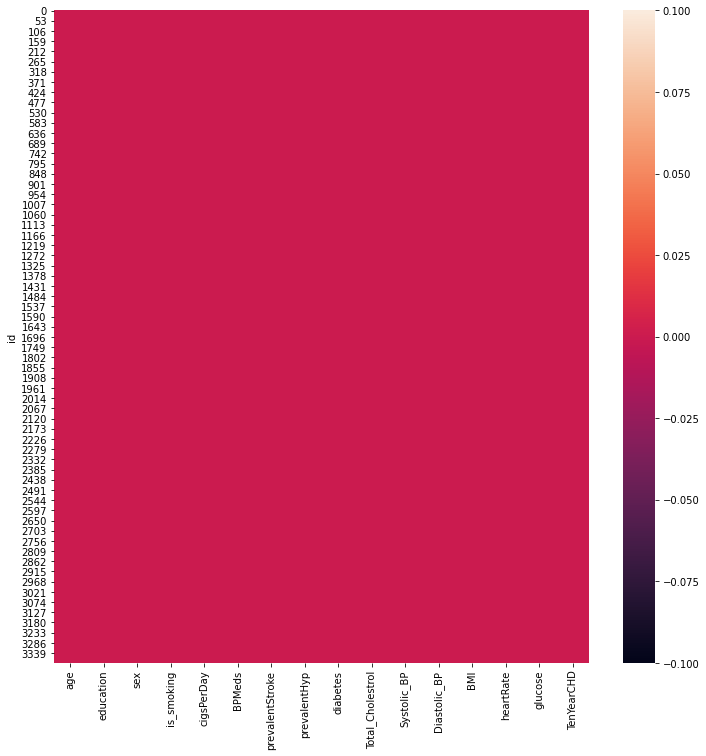

In [20]:
#Plotting the heatmap after treating the missing values
plt.figure(figsize=(12,12))
sns.heatmap(filled_NaN)

In [21]:
cvs_df.isnull().sum()

age                 0
education           0
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
Total_Cholestrol    0
Systolic_BP         0
Diastolic_BP        0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

As seen above all the missing values has been treated.

#**Analysing the categorical features.**

**Which Sex is prone to coronary heart disease?**

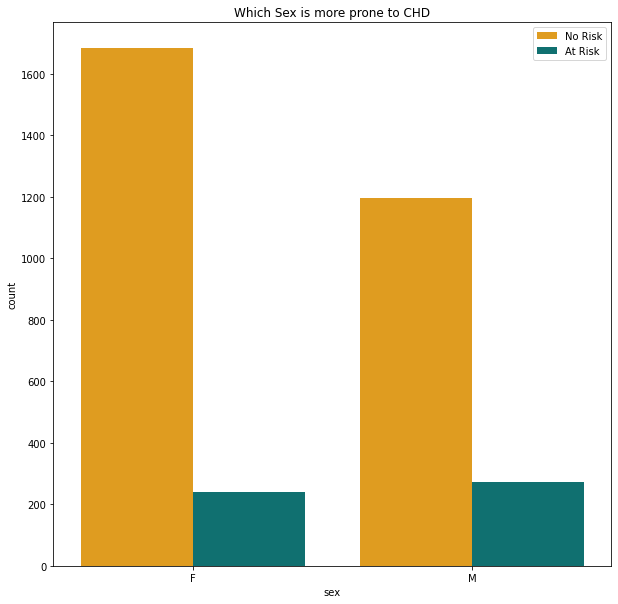

In [22]:
my_palette = {0 : 'orange' , 1 : 'teal'}
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
plt.figure(figsize = (10,10))
sns.countplot(x = cvs_df['sex'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Which Sex is more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

**Are diabetic patients at more risk of coronary heart disease ??**

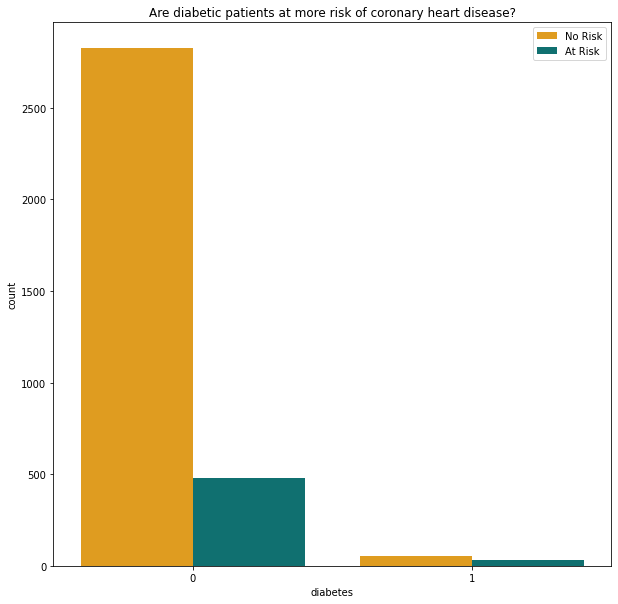

In [23]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = cvs_df['diabetes'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Are diabetic patients at more risk of coronary heart disease?")
plt.legend(['No Risk','At Risk'])
plt.show()

**Are smokers at more risk of coronary heart disease ??**

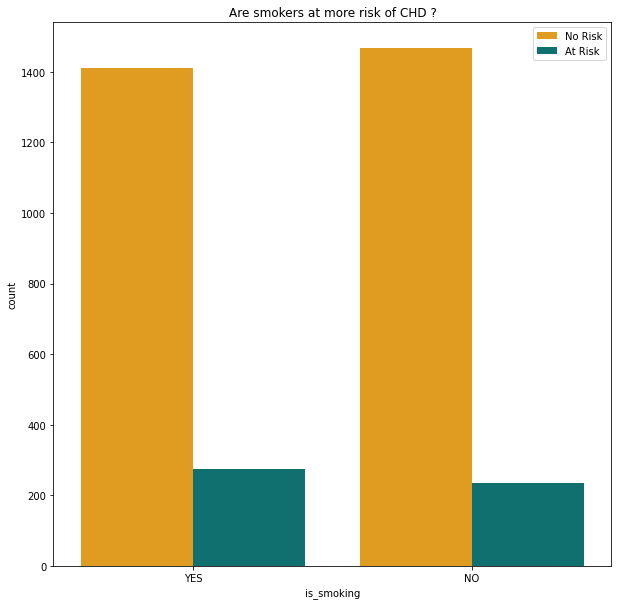

In [24]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = cvs_df['is_smoking'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Are smokers at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

**Are hypertensive patients at more risk of coronary heart disease ??**

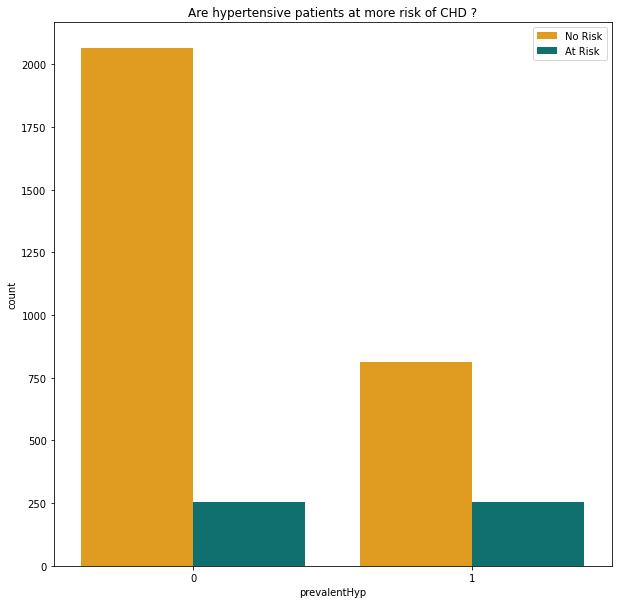

In [25]:
plt.figure(figsize = (10,10))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = cvs_df['prevalentHyp'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Are hypertensive patients at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

**Are patients with blood pressure on medication at more risk of coronary heart disease ??**

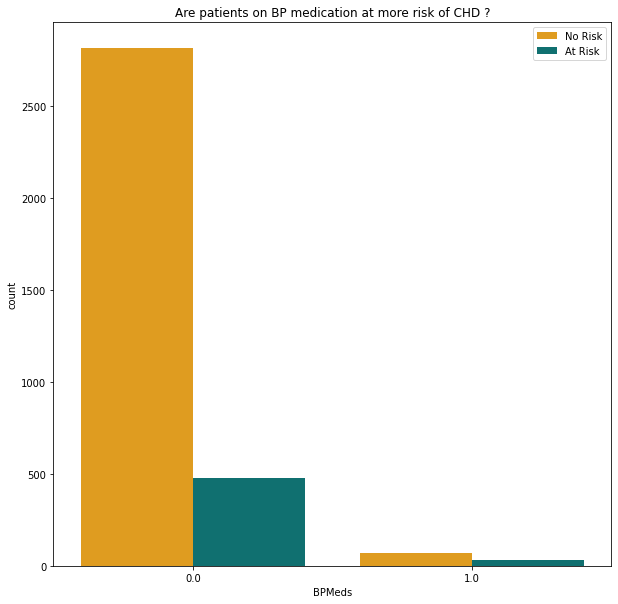

In [26]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = cvs_df['BPMeds'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Are patients on BP medication at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

**Which Age group is more vulnerable to coronary heart disease ?**

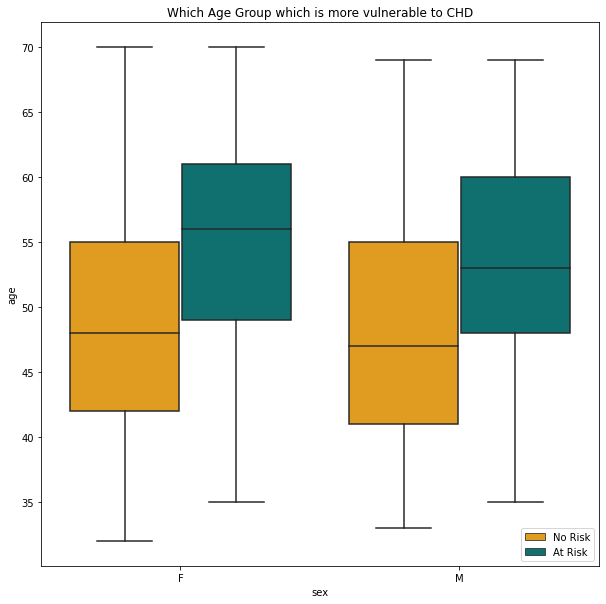

In [27]:
plt.figure(figsize = (10,10))
ax = sns.boxplot(x = cvs_df['sex'], y = cvs_df['age'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Which Age Group which is more vulnerable to CHD")
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

**Are Total Cholestrol levels related to coronary heart disease ??**

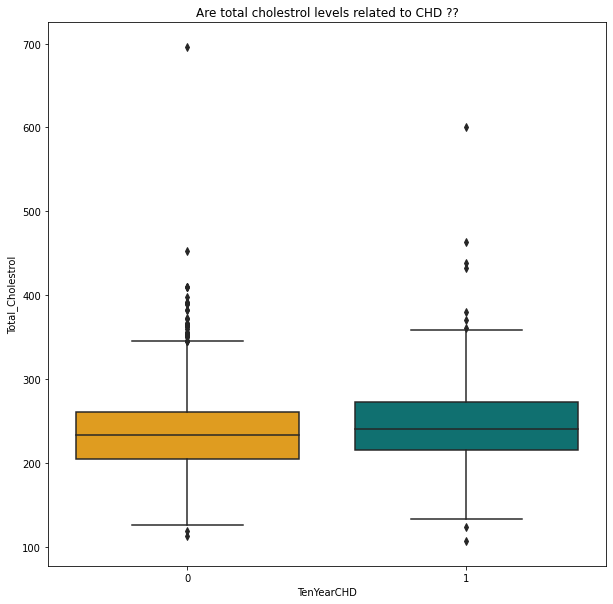

In [28]:
plt.figure(figsize = (10,10))
sns.boxplot(cvs_df['TenYearCHD'], cvs_df['Total_Cholestrol'], palette = my_palette)
plt.title("Are total cholestrol levels related to CHD ??")
plt.show()

This indicates that cholestrol level is not the sole deciding factor for predicting whether the person gets coronary heart disease or not. People with similar levels of cholestrol have got coronary heart disease as well as are free from coronary heart disease. Clearly, there is no direct correlation of coronary heart disease with the cholestrol level.

**Let's take a deeper look into it.**

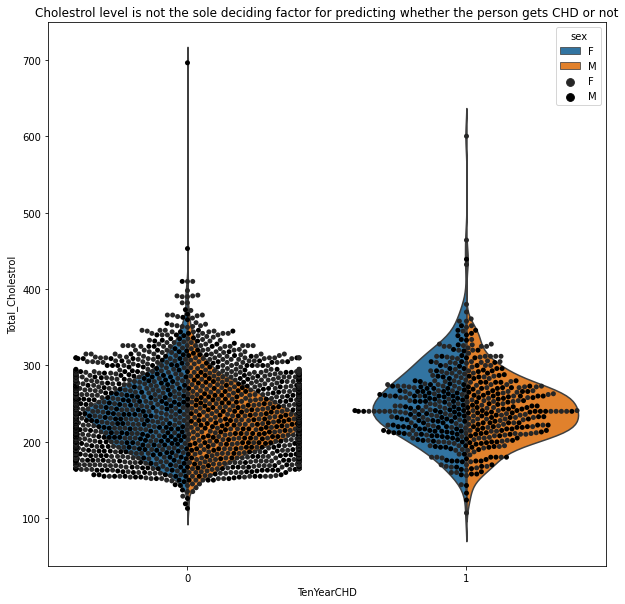

In [29]:
gender_palette = {'male' : 'teal', 'female' : 'orange'}
plt.figure(figsize = (10,10))
sns.violinplot(cvs_df['TenYearCHD'], cvs_df['Total_Cholestrol'], hue = cvs_df['sex'], split = True)
sns.swarmplot(cvs_df['TenYearCHD'], cvs_df['Total_Cholestrol'], color = 'black',hue = cvs_df['sex'])
plt.title("Cholestrol level is not the sole deciding factor for predicting whether the person gets CHD or not")
  
plt.show()

The above plot confirms the inference made above.

**Is Heart rate is responsible for CHD ??**

In [30]:
def heartRate_data(row):
    if row['heartRate'] <= 59:
        value = 'Low'
    elif row['heartRate'] < 100:
        value = 'Normal'
    else:
        value = "High"
    
    return value

In [31]:
cvs_df['heartRateLabel'] = cvs_df.apply(heartRate_data, axis = 1)

In [32]:
cvs_df['heartRateLabel'].value_counts

<bound method IndexOpsMixin.value_counts of id
0       Normal
1       Normal
2       Normal
3       Normal
4       Normal
         ...  
3385    Normal
3386    Normal
3387    Normal
3388    Normal
3389    Normal
Name: heartRateLabel, Length: 3390, dtype: object>

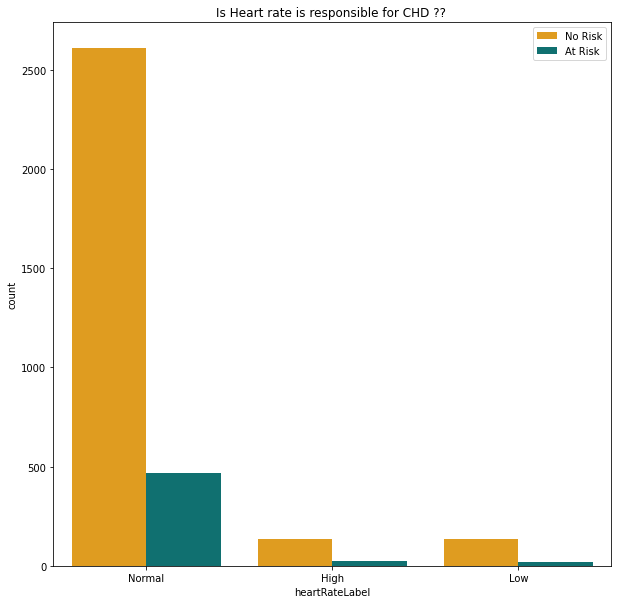

In [33]:
plt.figure(figsize = (10,10))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = cvs_df['heartRateLabel'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Is Heart rate is responsible for CHD ?? ")
plt.legend(['No Risk','At Risk'])
plt.show()

In [34]:
cvs_df.drop(columns=['heartRateLabel'], inplace=True)

**How much smoking affect CHD?**

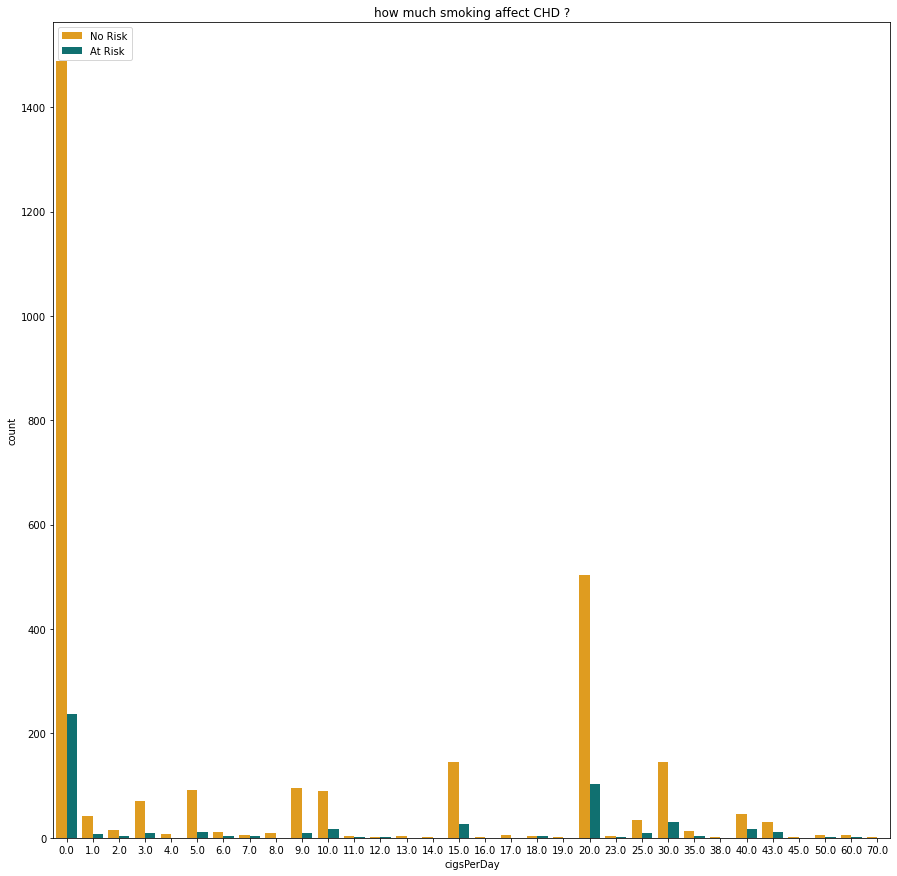

In [35]:
plt.figure(figsize = (15,15))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = cvs_df['cigsPerDay'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("how much smoking affect CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

**Are patients with systolic BP at risk of CHD?**

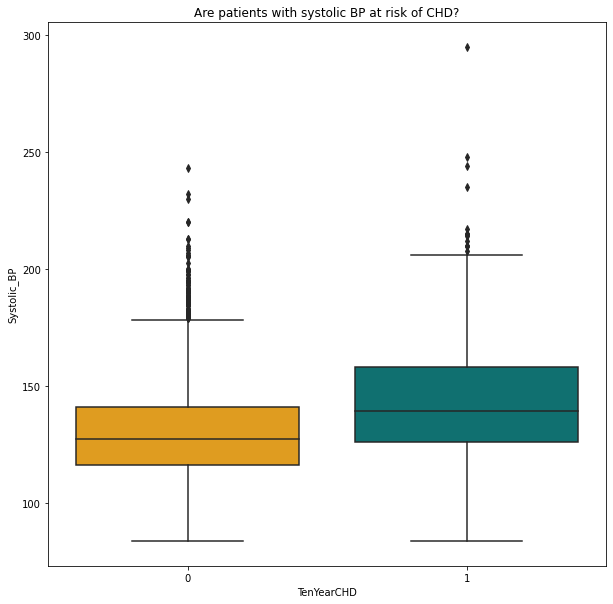

In [36]:
plt.figure(figsize = (10,10))
sns.boxplot(cvs_df['TenYearCHD'], cvs_df['Systolic_BP'], palette = my_palette)
plt.title("Are patients with systolic BP at risk of CHD?")
plt.show()

**Are patients with Diastolic BP at risk of CHD?**

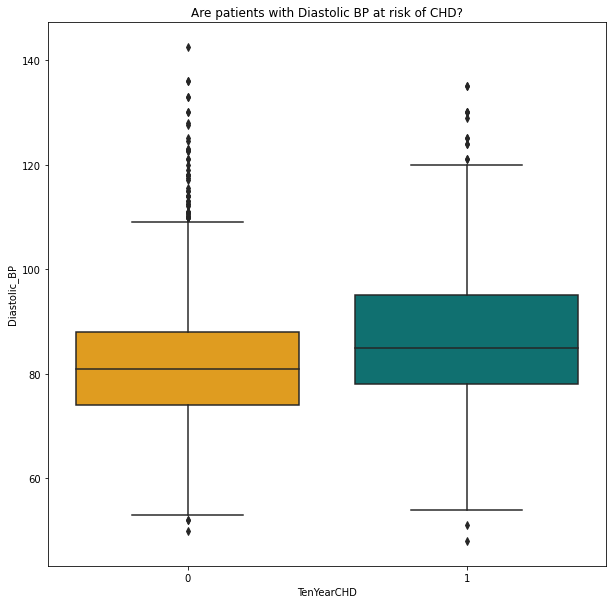

In [37]:
plt.figure(figsize = (10,10))
sns.boxplot(cvs_df['TenYearCHD'], cvs_df['Diastolic_BP'], palette = my_palette)
plt.title("Are patients with Diastolic BP at risk of CHD?")
plt.show()

Over the years, research has found that both numbers are equally important in monitoring heart health. However, most studies show a greater risk of stroke and heart disease related to higher systolic pressures compared with elevated diastolic pressures.